In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df1 = pd.read_csv('multi.csv')
df1

,x,y
0,104.33,102.08
1,104.62,101.24
2,104.72,102.17
3,104.80,102.20
4,104.87,111.91
5,105.06,101.27
6,104.95,121.82
7,104.90,111.56
8,104.85,101.42
9,104.92,101.60


### disini saya mengestimasi betanya dengan cara metode regresi sederhana dimana formulanya yaitu dengan matriks 

#### dengan formula  $$
$$
\mathbf{A} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}
$$



In [21]:
# Misalkan df adalah DataFrame yang sudah didefinisikan sebelumnya
# Misalkan 'x1' dan 'x2' adalah nama kolom di DataFrame df
# X = np.array(df[['x1', 'x2']])  # Ambil kolom 'x1' dan 'x2' dari DataFrame
X = np.column_stack((np.ones(df1.shape[0]), df1[['x']]))
Y = np.array(df1[['y']])  # Nilai-nilai untuk Y
# Menghitung (X^T * X)
X_transpose = X.T
XTX = X_transpose @ X

# Menghitung invers dari (X^T * X)
XTX_inv = np.linalg.inv(XTX)

# Menghitung (X^T * Y)
XTY = X_transpose @ Y

# Menghitung hasil akhir
result = XTX_inv @ XTY

# Menampilkan hasil
print("Hasil:")
print(result)

Hasil:
[[1.85611246]
 [0.98928652]]


## kita buat plot dengan beta_0 dan beta_1 dengan cara matriks


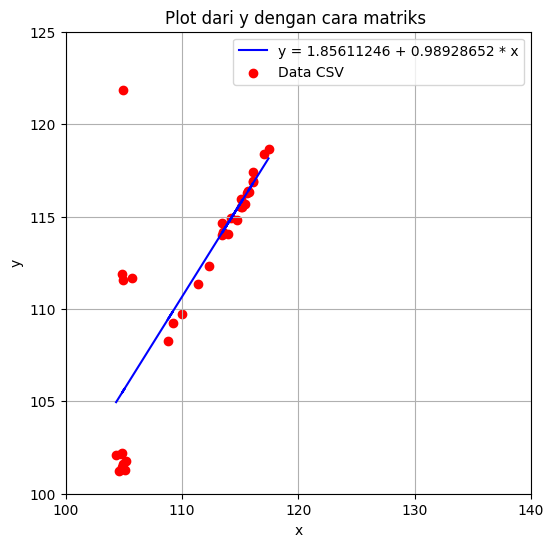

In [22]:
# Misalkan df1, beta_0, dan beta_1 sudah didefinisikan
# df1 = pd.read_csv('data.csv')  # Contoh cara membaca data
# beta_0 = 1000  # Contoh nilai beta_0
# beta_1 = 3000  # Contoh nilai beta_1

# Buat array x dari DataFrame
x1 = df1['x'] 

# Hitung nilai y
y = 1.85611246+  0.98928652* x1


# Plot
plt.figure(figsize=(6, 6))
plt.plot(x1, y1, label=f'y = {1.85611246} + {0.98928652} * x', color='blue')
plt.scatter(df1['x'], df1['y'], color='red', label='Data CSV')
plt.title('Plot dari y dengan cara matriks ')
plt.xlabel('x')
plt.ylabel('y')

# Menetapkan limit sumbu
plt.xlim(100, 130)  # Sesuaikan sesuai kebutuhan
plt.ylim(min(y), max(y))  # Sesuaikan dengan rentang nilai y yang dihitung

# # Garis horizontal dan vertikal di sumbu
# plt.axhline(0, color='black', lw=0.5, ls='--')
# plt.axvline(0, color='black', lw=0.5, ls='--')

# Mengatur ticks
plt.xticks(np.arange(100, 150, 10)) 
plt.yticks(np.arange(100, max(y) + 10, 5))  # Menyesuaikan rentang y

plt.grid()
plt.legend()
plt.show()

#### setelah itu saya akan mencari nilai R-kuadrat dari matriks tersebut

In [23]:
df1['xy'] = df1['x'] * df1['y']
df1['x^2'] = df1['x'] * df1['x']
df1['y^2'] = df1['y'] * df1['y']
# menegtahui jumlah nya 
a= df1['x'].sum()
b= df1['y'].sum()
c =df1['xy'].sum()
d = df1['x^2'].sum()
e = df1['y^2'].sum()
f = df1['y'].mean()
g = df1['x'].mean()


print("Jumlah kolom 'x':", a)
print("Jumlah kolom 'y':", b)
print("Jumlah kolom 'xy':", c)
print("Jumlah kolom 'x^2':", d)
print("Jumlah kolom 'y^2':", e)
print('rata-rata y ', f)
print('rata-rata x ', g)

Jumlah kolom 'x': 3999.6400000000003
Jumlah kolom 'y': 4023.61
Jumlah kolom 'xy': 447837.4438
Jumlah kolom 'x^2': 445183.1209999999
Jumlah kolom 'y^2': 450996.25589999993
rata-rata y  111.76694444444445
rata-rata x  111.10111111111112


In [24]:
# menghitung R kuadrat
k =  ((y-f)**2)
l = ((df1['y']- f)**2)
JKR = k.sum()
JKT = l.sum()
RKR = JKT/1
JKS = JKT - JKR
dk_galat = df1.shape[0] - 2
dk_total = df1.shape[0] - 1
RKS = JKS/dk_galat
f_statistik = RKR/RKS

R_kuadrat = JKR/JKT
print("jumlah r kuadrat yaitu ",R_kuadrat)
print("nilai Jkr yaitu ",JKR)
print("nilai JKT yaitu  ",JKT)
print("nilai JKS yaitu ",JKS)
print("jumlah nilai RKR ",RKR)
print("dgree of freedom pada galat ",dk_galat)
print("print degre of freedom total ",dk_total)
print("jumlah nilai RKS ", RKS)
print("F_statisiknya yaitu ",f_statistik)


jumlah r kuadrat yaitu  0.621268317802488
nilai Jkr yaitu  801.2252490634583
nilai JKT yaitu   1289.660563888889
nilai JKS yaitu  488.43531482543085
jumlah nilai RKR  1289.660563888889
dgree of freedom pada galat  34
print degre of freedom total  35
jumlah nilai RKS  14.365744553689142
F_statisiknya yaitu  89.77331867965748


## dan saya lanjutkan dengan cara estimasi biasa dengan formula 

# Rumus Kemiringan (Slope) Regresi Linier

$$
b_1 = \frac{\sum (X_i Y_i) - \frac{(\sum X_i)(\sum Y_i)}{n}}{\sum X_i^2 - \frac{(\sum X_i)^2}{n}}
$$

#### dan b0 di dapatkan 


$$
b_0 = \bar{Y} - b_1 \bar{X}
$$


In [25]:
beta_1 = (c -((a*b)/30))/(d - (a**2/30))
beta_1

np.float64(1.0061483660928043)

In [26]:
beta_0 = f - beta_1*g
beta_0

np.float64(-0.017256971095122253)

## maka saya akan bentuk plot nya yaitu 


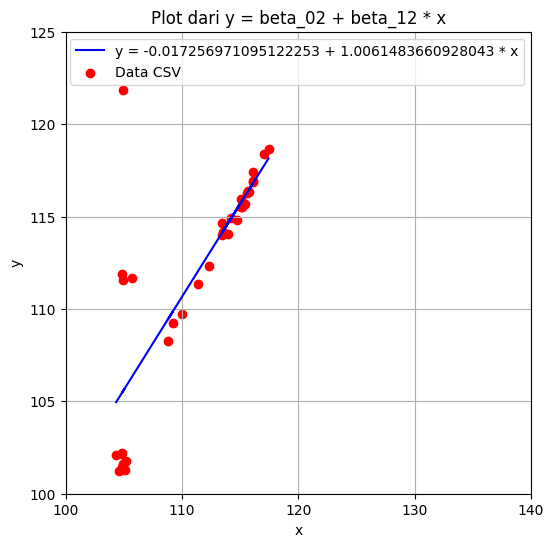

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Pastikan Anda mengimpor pandas jika menggunakan DataFrame

# Misalkan df1, beta_0, dan beta_1 sudah didefinisikan
# df1 = pd.read_csv('data.csv')  # Contoh cara membaca data
# beta_0 = 1000  # Contoh nilai beta_0
# beta_1 = 3000  # Contoh nilai beta_1

# Buat array x dari DataFrame
x1 = df1['x'] 

# Hitung nilai y
y1 = beta_0 +  beta_1* x1


# Plot
plt.figure(figsize=(6, 6))
plt.plot(x1, y1, label=f'y = {beta_0} + {beta_1} * x', color='blue')
plt.scatter(df1['x'], df1['y'], color='red', label='Data CSV')
plt.title('Plot dari y = beta_02 + beta_12 * x')
plt.xlabel('x')
plt.ylabel('y')

# Menetapkan limit sumbu
plt.xlim(100, 130)  # Sesuaikan sesuai kebutuhan
plt.ylim(min(y), max(y))  # Sesuaikan dengan rentang nilai y yang dihitung

# # Garis horizontal dan vertikal di sumbu
# plt.axhline(0, color='black', lw=0.5, ls='--')
# plt.axvline(0, color='black', lw=0.5, ls='--')

# Mengatur ticks
plt.xticks(np.arange(100, 150, 10)) 
plt.yticks(np.arange(100, max(y) + 10, 5))  # Menyesuaikan rentang y

plt.grid()
plt.legend()
plt.show()


In [28]:
# menghitung R kuadrat
k =  ((y1-f)**2)
l = ((df1['y']- f)**2)
JKR = k.sum()
JKT = l.sum()
RKR = JKT/1
JKS = JKT - JKR
dk_galat = df1.shape[0] - 2
dk_total = df1.shape[0] - 1
RKS = JKS/dk_galat
f_statistik = RKR/RKS

R_kuadrat = JKR/JKT
print("jumlah r kuadrat yaitu ",R_kuadrat)
print("nilai Jkr yaitu ",JKR)
print("nilai JKT yaitu  ",JKT)
print("nilai JKS yaitu ",JKS)
print("jumlah nilai RKR ",RKR)
print("dgree of freedom pada galat ",dk_galat)
print("print degre of freedom total ",dk_total)
print("jumlah nilai RKS ", RKS)
print("F_statisiknya yaitu ",f_statistik)


jumlah r kuadrat yaitu  0.6426271599293119
nilai Jkr yaitu  828.7709054447516
nilai JKT yaitu   1289.660563888889
nilai JKS yaitu  460.88965844413747
jumlah nilai RKR  1289.660563888889
dgree of freedom pada galat  34
print degre of freedom total  35
jumlah nilai RKS  13.555578189533454
F_statisiknya yaitu  95.13873520235846


In [37]:
selisih_r_kuadrat = 0.6426271599293119 -  0.621268317802488
selisih_r_kuadrat

0.021358842126823818

### Kesimpulannya tidak ada perbedaan jauh antara metode matriks dan metode estimasi biasa pada anlisis sederhana ini